# Simulation of Stochastic Models using Euler-Maruyama method:
$$
X_{t+\Delta t} = X_t + a(X_t, t)\, \Delta t + b(X_t, t)\, \sqrt{\Delta t}\, \xi_t
$$
 with $\xi_t \sim \mathcal{N}(0,1)$ i.i.d., $ i = 0,1,2,...,N – 1 $ and with the initial value $ X(t_0) = X_0 $


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ornstein–Uhlenbeck Process:
$$
\begin{align}
dX_t &= -\theta (X_t-\mu)\,dt + \sigma\,dW_t \\
X_0 &= x_0
\end{align}
$$

In [4]:
T = 12.0
dt = 0.01

def simulate_ou(theta, mu, sigma, x0, T, dt, seed=None):
    if seed is not None:
        np.random.seed(seed)
    n_steps = int(np.ceil(T / dt))
    t = np.linspace(0, T, n_steps + 1)
    X = np.empty(n_steps + 1)
    X[0] = x0
    sqrt_dt = np.sqrt(dt)
    for i in range(n_steps):
        xi = np.random.normal()
        X[i+1] = X[i] + -theta * (X[i] - mu) * dt + sigma * sqrt_dt * xi
    return t, X


In [12]:
T = 12.0
dt = 0.01
n_runs = 100

def average_ou(theta, mu, sigma, x0, T, dt, n_runs, seed=42):
    n_steps = int(np.ceil(T / dt))
    store_X = np.zeros((n_runs, n_steps + 1))
    for i in range(n_runs):
        _, X = simulate_ou(theta, mu, sigma, x0, T, dt, seed + i)
        store_X[i] = X
    mean_X = np.mean(store_X, axis=0)
    t = np.linspace(0, T, n_steps + 1)
    return t, mean_X

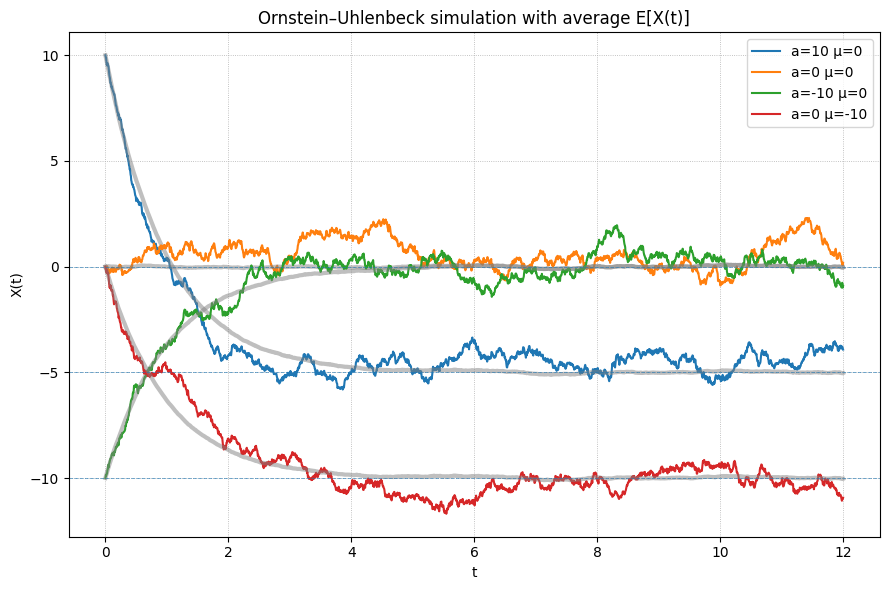

In [24]:

def plot_multiple_ou(param_list, T=12.0, dt=0.01, n_avg=200, seed=42):
    plt.figure(figsize=(9,6))
    for i, p in enumerate(param_list):
        t, X = simulate_ou(
            theta=p.get('theta', 1.0),
            mu=p.get('mu', 0.0),
            sigma=p.get('sigma', 1.0),
            x0=p.get('x0', 0.0),
            T=T,
            dt=dt,
            seed=(seed + i)
        )

        label = p.get('label') or f"θ={p.get('theta'):g}, μ={p.get('mu'):g}"
        plt.plot(t, X, label=label)

        # Here we add an average curve
        t_avg, X_avg = average_ou(
            theta=p.get('theta', 1.0),
            mu=p.get('mu', 0.0),
            sigma=p.get('sigma', 1.0),
            x0=p.get('x0', 0.0),
            T=T,
            dt=dt,
            n_runs=n_avg,
            seed=(seed + 1000 + i)
        )
        plt.plot(t_avg, X_avg, color='gray', linewidth=3, alpha=0.5)

    mus = {p.get('mu', 0.0) for p in param_list}
    for mu in mus:
        plt.axhline(mu, linestyle='--', linewidth=0.7, alpha=0.6)

    plt.xlabel("t")
    plt.ylabel("X(t)")
    plt.title("Ornstein–Uhlenbeck simulation with average E[X(t)]")
    plt.grid(True, which='both', linestyle=':', linewidth=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


params = [
        {"theta": 1.0,  "mu": -5.0,  "sigma": 1.0, "x0": 10.0,  "label": "a=10 μ=0"},
        {"theta": 1.0,  "mu": 0.0,  "sigma": 1.0, "x0": 0.0,   "label": "a=0 μ=0"},
        {"theta": 1.0,  "mu": 0.0,  "sigma": 1.0, "x0": -10.0, "label": "a=-10 μ=0"},
        {"theta": 1.0,  "mu": -10.0,"sigma": 1.0, "x0": 0.0,   "label": "a=0 μ=-10"},
    ]

plot_multiple_ou(params, T=12.0, dt=0.005, n_avg=300, seed=2025)

## Gompertz or Fox Process
$$
dX_t = a X_t \ln\left( \frac{b}{X_t} \right) dt + \sigma X_t \, dW_t
$$

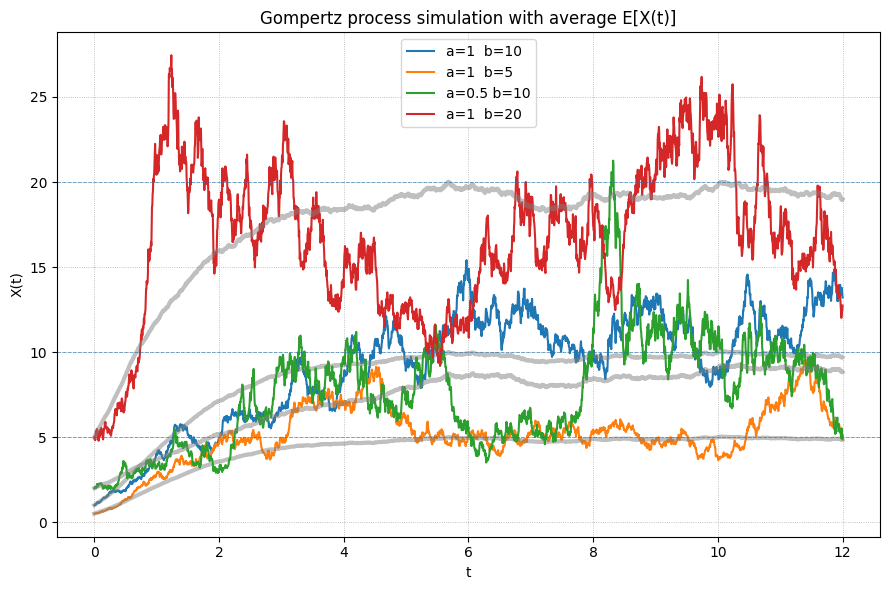

In [25]:
T = 12.0
dt = 0.01

def simulate_gompertz(a, b, sigma, x0, T, dt, seed=None):
    if seed is not None:
        np.random.seed(seed)
    n_steps = int(np.ceil(T / dt))
    t = np.linspace(0, T, n_steps + 1)
    X = np.empty(n_steps + 1)
    X[0] = x0
    sqrt_dt = np.sqrt(dt)
    for i in range(n_steps):
        xi = np.random.normal()
        drift = a * X[i] * (np.log(b) - np.log(abs(X[i]) + 1e-8))  # we need to be careful to avoid log(0)
        diffusion = sigma * X[i] * xi * sqrt_dt
        X[i + 1] = X[i] + drift * dt + diffusion
        if X[i + 1] <= 0:  # keep X positive
            X[i + 1] = abs(X[i + 1])
    return t, X

T = 12.0
dt = 0.01
n_runs = 100

def average_gompertz(a, b, sigma, x0, T, dt, n_runs, seed=42):
    n_steps = int(np.ceil(T / dt))
    store_X = np.zeros((n_runs, n_steps + 1))
    for i in range(n_runs):
        _, X = simulate_gompertz(a, b, sigma, x0, T, dt, seed + i)
        store_X[i] = X
    mean_X = np.mean(store_X, axis=0)
    t = np.linspace(0, T, n_steps + 1)
    return t, mean_X

def plot_multiple_gompertz(param_list, T=12.0, dt=0.01, n_avg=200, seed=42):

    plt.figure(figsize=(9, 6))
    for i, p in enumerate(param_list):
        t, X = simulate_gompertz(
            a=p.get('a', 1.0),
            b=p.get('b', 1.0),
            sigma=p.get('sigma', 0.5),
            x0=p.get('x0', 1.0),
            T=T,
            dt=dt,
            seed=(seed + i)
        )

        label = p.get('label') or f"a={p.get('a'):g}, b={p.get('b'):g}"
        plt.plot(t, X, label=label)

        t_avg, X_avg = average_gompertz(
            a=p.get('a', 1.0),
            b=p.get('b', 1.0),
            sigma=p.get('sigma', 0.5),
            x0=p.get('x0', 1.0),
            T=T,
            dt=dt,
            n_runs=n_avg,
            seed=(seed + 1000 + i)
        )
        plt.plot(t_avg, X_avg, color='gray', linewidth=3, alpha=0.5)

    bs = {p.get('b', 1.0) for p in param_list}
    for b in bs:
        plt.axhline(b, linestyle='--', linewidth=0.7, alpha=0.6)

    plt.xlabel("t")
    plt.ylabel("X(t)")
    plt.title("Gompertz process simulation with average E[X(t)]")
    plt.grid(True, which='both', linestyle=':', linewidth=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()



params = [
        {"a": 1.0,  "b": 10.0, "sigma": 0.3, "x0": 1.0,  "label": "a=1  b=10"},
        {"a": 1.0,  "b": 5.0,  "sigma": 0.3, "x0": 0.5,  "label": "a=1  b=5"},
        {"a": 0.5,  "b": 10.0, "sigma": 0.5, "x0": 2.0,  "label": "a=0.5 b=10"},
        {"a": 1.0,  "b": 20.0, "sigma": 0.4, "x0": 5.0,  "label": "a=1  b=20"},
    ]

plot_multiple_gompertz(params, T=12.0, dt=0.005, n_avg=300, seed=2025)

## Black-Scholes
$$
dS_t = \mu S_t\, dt + \sigma S_t\, dW_t
$$


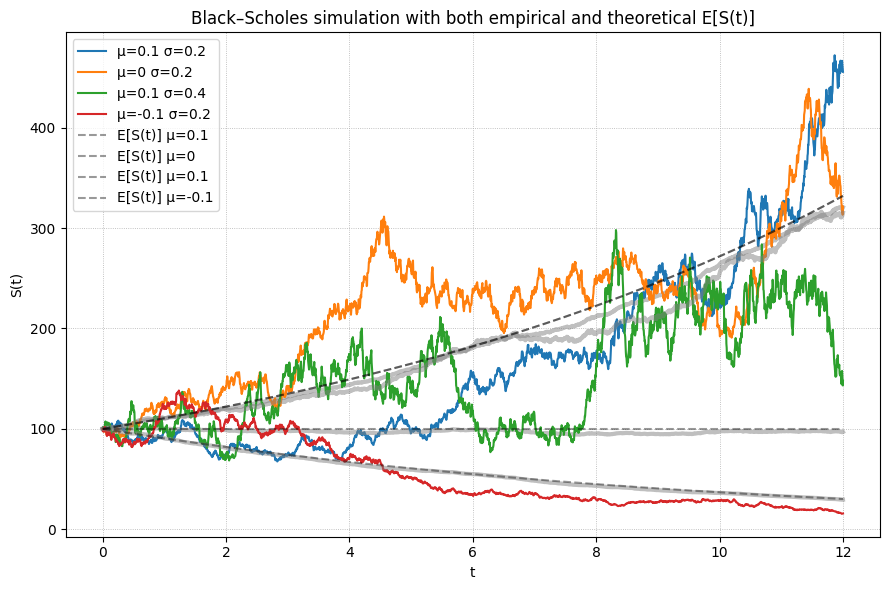

In [26]:
def simulate_black_scholes(mu, sigma, s0, T=12.0, dt=0.01, seed=None):
    if seed is not None:
        np.random.seed(seed)
    n_steps = int(np.ceil(T / dt))
    t = np.linspace(0, T, n_steps + 1)
    S = np.empty(n_steps + 1)
    S[0] = s0
    sqrt_dt = np.sqrt(dt)
    for i in range(n_steps):
        xi = np.random.normal()
        S[i + 1] = S[i] + mu * S[i] * dt + sigma * S[i] * xi * sqrt_dt
        if S[i + 1] <= 0:
            S[i + 1] = abs(S[i + 1])  # eliminate negatives
    return t, S

def average_black_scholes(mu, sigma, s0, T=12.0, dt=0.01, n_runs=100, seed=42):

    n_steps = int(np.ceil(T / dt))
    all_S = np.zeros((n_runs, n_steps + 1))
    for i in range(n_runs):
        _, S = simulate_black_scholes(mu, sigma, s0, T, dt, seed + i)
        all_S[i] = S
    mean_S = np.mean(all_S, axis=0)
    t = np.linspace(0, T, n_steps + 1)
    return t, mean_S


def plot_multiple_black_scholes(param_list, T=12.0, dt=0.01, n_avg=200, seed=42):
    plt.figure(figsize=(9, 6))
    for i, p in enumerate(param_list):
        t, S = simulate_black_scholes(
            mu=p.get('mu', 0.1),
            sigma=p.get('sigma', 0.2),
            s0=p.get('s0', 100.0),
            T=T,
            dt=dt,
            seed=(seed + i)
        )
        label = p.get('label') or f"μ={p.get('mu'):g}, σ={p.get('sigma'):g}"
        plt.plot(t, S, label=label)

        t_avg, S_avg = average_black_scholes(
            mu=p.get('mu', 0.1),
            sigma=p.get('sigma', 0.2),
            s0=p.get('s0', 100.0),
            T=T,
            dt=dt,
            n_runs=n_avg,
            seed=(seed + 1000 + i)
        )
        plt.plot(t_avg, S_avg, color='gray', linewidth=3, alpha=0.5)

    t_theoretical = np.linspace(0, T, 300)
    for p in param_list:
        mu = p.get('mu', 0.1)
        s0 = p.get('s0', 100.0)
        expected = s0 * np.exp(mu * t_theoretical)
        plt.plot(t_theoretical, expected, 'k--', alpha=0.4, label=f"E[S(t)] μ={mu:g}")

    plt.xlabel("t")
    plt.ylabel("S(t)")
    plt.title("Black–Scholes simulation with both empirical and theoretical E[S(t)]")
    plt.grid(True, which='both', linestyle=':', linewidth=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


params = [
        {"mu": 0.1,  "sigma": 0.2, "s0": 100.0, "label": "μ=0.1 σ=0.2"},
        {"mu": 0.0,  "sigma": 0.2, "s0": 100.0, "label": "μ=0 σ=0.2"},
        {"mu": 0.1,  "sigma": 0.4, "s0": 100.0, "label": "μ=0.1 σ=0.4"},
        {"mu": -0.1, "sigma": 0.2, "s0": 100.0, "label": "μ=-0.1 σ=0.2"},
    ]

plot_multiple_black_scholes(params, T=12.0, dt=0.005, n_avg=300, seed=2025)